In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 

# Reading the traina and test data from the txt file
X_train = pd.read_csv('Dataset/UCI HAR Dataset/train/X_train.txt',delim_whitespace=True,header=None)
Y_train = pd.read_csv('Dataset/UCI HAR Dataset/train/y_train.txt',delim_whitespace=True,header=None)
X_test = pd.read_csv('Dataset/UCI HAR Dataset/test/X_test.txt',delim_whitespace=True,header=None)
Y_test = pd.read_csv('Dataset/UCI HAR Dataset/test/y_test.txt',delim_whitespace=True,header=None)

Y_train = Y_train.squeeze()
Y_test = Y_test.squeeze()

In [2]:
print("X_train shape = %s, Y_train shape= %s "%(X_train.shape, Y_train.shape))
print("X_test shape = %s, Y_test shape= %s "%(X_test.shape, Y_test.shape))

X_train shape = (7352, 561), Y_train shape= (7352,) 
X_test shape = (2947, 561), Y_test shape= (2947,) 


In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, Y_train)

KNeighborsClassifier()

In [7]:
predictions = neigh.predict(X_test)
#getting the accuracy
score = neigh.score(X_test, Y_test)
print(score)

0.9015948422124194


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[485   2   9   0   0   0]
 [ 40 424   7   0   0   0]
 [ 45  45 330   0   0   0]
 [  0   3   0 389  99   0]
 [  0   0   0  37 495   0]
 [  0   0   0   2   1 534]]


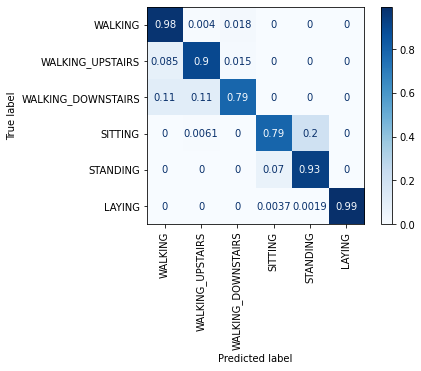

In [10]:
from sklearn.metrics import plot_confusion_matrix
class_names = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
plot_confusion_matrix(neigh, X_test, Y_test, cmap=plt.cm.Blues,
                                display_labels=class_names, xticks_rotation=90,
                                normalize='true')

## Parameter selection/tuning using Grid search

In [11]:
from sklearn.model_selection import GridSearchCV
n_neighbors = [1, 3, 5, 7, 10, 14]
leaf_size = [10, 20, 30, 40, 50]
param_grid = {'n_neighbors': n_neighbors, 'leaf_size': leaf_size}
gs = GridSearchCV(estimator=neigh, param_grid=param_grid, verbose=4, cv=5)


In [12]:
%%time 
gs.fit(X_train, Y_train )

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ....................leaf_size=10, n_neighbors=1; total time=   0.3s
[CV 2/5] END ....................leaf_size=10, n_neighbors=1; total time=   0.2s
[CV 3/5] END ....................leaf_size=10, n_neighbors=1; total time=   0.2s
[CV 4/5] END ....................leaf_size=10, n_neighbors=1; total time=   0.2s
[CV 5/5] END ....................leaf_size=10, n_neighbors=1; total time=   0.2s
[CV 1/5] END ....................leaf_size=10, n_neighbors=3; total time=   0.2s
[CV 2/5] END ....................leaf_size=10, n_neighbors=3; total time=   0.2s
[CV 3/5] END ....................leaf_size=10, n_neighbors=3; total time=   0.2s
[CV 4/5] END ....................leaf_size=10, n_neighbors=3; total time=   0.2s
[CV 5/5] END ....................leaf_size=10, n_neighbors=3; total time=   0.2s
[CV 1/5] END ....................leaf_size=10, n_neighbors=5; total time=   0.2s
[CV 2/5] END ....................leaf_size=10, 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [1, 3, 5, 7, 10, 14]},
             verbose=4)

In [13]:
results = pd.DataFrame.from_dict(gs.cv_results_)
scores_matrix = results.pivot(index='param_n_neighbors', columns='param_leaf_size',
                                values='mean_test_score')

Text(0, 0.5, 'mean_test_score')

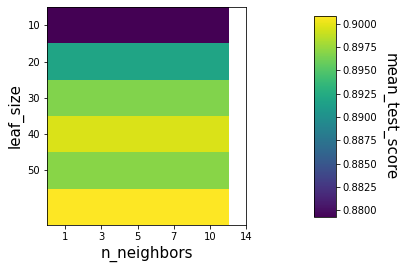

In [17]:
fig, ax = plt.subplots()
im = ax.imshow(scores_matrix)

ax.set_xticks(np.arange(len(n_neighbors)))
ax.set_xticklabels(['{:d}'.format(x) for x in n_neighbors])
ax.set_xlabel('n_neighbors', fontsize=15)

ax.set_yticks(np.arange(len(leaf_size)))
ax.set_yticklabels(['{:d}'.format(x) for x in leaf_size])
ax.set_ylabel('leaf_size', fontsize=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel('mean_test_score', rotation=-90, va="bottom",
                    fontsize=15)

In [18]:
gs.cv_results_['mean_test_score']

array([0.87922067, 0.89187086, 0.89676614, 0.89962338, 0.89703862,
       0.90084731, 0.87922067, 0.89187086, 0.89676614, 0.89962338,
       0.89703862, 0.90084731, 0.87922067, 0.89187086, 0.89676614,
       0.89962338, 0.89703862, 0.90084731, 0.87922067, 0.89187086,
       0.89676614, 0.89962338, 0.89703862, 0.90084731, 0.87922067,
       0.89187086, 0.89676614, 0.89962338, 0.89703862, 0.90084731])

In [19]:
gs.cv_results_['mean_test_score'].max()

0.9008473110522252

In [20]:
gs.score(X_test, Y_test)

0.9036308109942314